In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
PATH_GLOFAS4 = Path('Z:/nahaUsers/casadje/GloFASv4')
PATH_GLOFAS5 = Path('Z:/nahaUsers/casadje/GloFASv5')

## Reservoirs

### GloFAS4

In [36]:
reservoirs4 = gpd.read_file(PATH_GLOFAS4 / 'tables' / 'GloFAS_reservoirs.shp').set_index('ResID')
reservoirs4.rename(columns={'stor': 'CAP_MCM'}, inplace=True)

reservoirs4.plot(markersize=1)
plt.title('GloFAS4')
plt.axis('off');

### GloFAS5

In [38]:
reservoirs5 = gpd.read_file(PATH_GLOFAS5 / 'reservoirs' / 'tables' / 'ReservoirGlofas+GDW.shp').set_index('id')

reservoirs5.plot(markersize=1)
plt.title('GloFAS5')
plt.axis('off');

### Comparison

In [79]:
reservoirs = {
    'GloFASv4': reservoirs4,
    'GloFASv5': reservoirs5
}

summary_res = pd.DataFrame(index=['count', 'storage'], columns=reservoirs.keys(), dtype=float)
for name, gdf in reservoirs.items():
    summary_res.loc['count', name] = len(gdf)
    summary_res.loc['storage', name] = gdf.CAP_MCM.sum() * 1e-4
    
summary_res

,GloFASv4,GloFASv5
count,685.00000,1710.00000
storage,458.84998,637.89997


In [110]:
total_storage = 765 # 10 km3

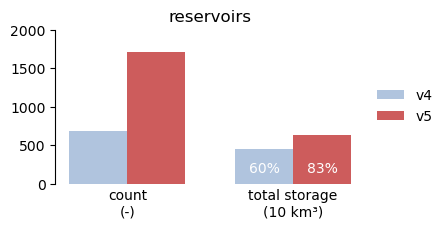

In [120]:
fig, ax = plt.subplots(figsize=(4, 2))
w = .7
x = np.array([1, 3])
ax.bar(x - w / 2, summary_res.GloFASv4, width=w, color='lightsteelblue', label='v4')
ax.bar(x + w / 2, summary_res.GloFASv5, width=w, color='indianred', label='v5')
ax.set_xticks(x)
ax.set_xticklabels(['count\n(-)', 'total storage\n(10 km³)'])
ax.tick_params(axis='x', length=0)
yticks = np.linspace(0, 2000, 5)
ax.set_yticks(yticks)
ax.spines[['bottom', 'right', 'top']].set_visible(False)
ax.set_title('reservoirs')
for loc, col in zip([-1, 1], summary_res.columns):
    pct_storage = summary_res[col].storage / total_storage * 100
    ax.text(x[-1] + loc * w / 2, 200, f'{pct_storage:.0f}%', ha='center', va='center', c='w')
fig.legend(frameon=False, loc=5, bbox_to_anchor=[.9, .4, .2, .2]);

plt.savefig('reservoirs_GloFAS4_vs_GloFAS5.jpg', dpi=300, bbox_inches='tight');

## Lakes
### GloFAS4

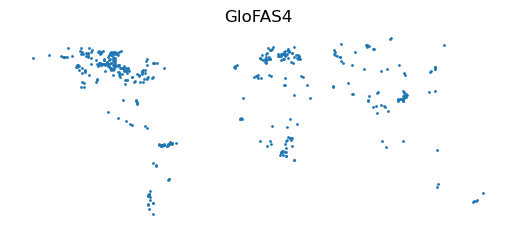

In [71]:
lakes4 = gpd.read_file(PATH_GLOFAS4 / 'tables' / 'GloFAS4_lakes.shp').set_index('LAK_ID')

lakes4.plot(markersize=1)
plt.title('GloFAS4')
plt.axis('off');

### GloFAS5

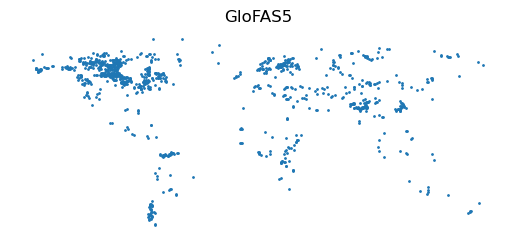

In [72]:
lakes5 = gpd.read_file(PATH_GLOFAS5 / 'lakes' / 'tables' / 'lakesGlofasV6.shp')#.set_index('id')

lakes5.plot(markersize=1)
plt.title('GloFAS5')
plt.axis('off');

### Comparison

In [89]:
lakes = {
    'GloFASv4': lakes4,
    'GloFASv5': lakes5
}

summary_lak = pd.DataFrame(index=['count', 'area'], columns=lakes.keys(), dtype=float)
for name, gdf in lakes.items():
    summary_lak.loc['count', name] = len(gdf)
    summary_lak.loc['area', name] = gdf.AREA_SKM.sum() * 1e-3
    
summary_lak

,GloFASv4,GloFASv5
count,463.000,1009.00000
area,755.377,1299.75378


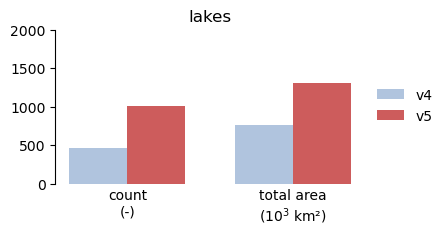

In [122]:
fig, ax = plt.subplots(figsize=(4, 2))
w = .7
x = np.array([1, 3])
ax.bar(x - w / 2, summary_lak.GloFASv4, width=w, color='lightsteelblue', label='v4')
ax.bar(x + w / 2, summary_lak.GloFASv5, width=w, color='indianred', label='v5')
ax.set_xticks(x)
ax.set_xticklabels(['count\n(-)', 'total area\n(10$^3$ km²)'])
ax.tick_params(axis='x', length=0)
yticks = np.linspace(0, 2000, 5)
ax.set_yticks(yticks)
ax.spines[['bottom', 'right', 'top']].set_visible(False)
ax.set_title('lakes')
fig.legend(frameon=False, loc=5, bbox_to_anchor=[.9, .4, .2, .2]);

plt.savefig('lakes_GloFAS4_vs_GloFAS5.jpg', dpi=300, bbox_inches='tight');